# Understanding the MONKEY Challenge Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset Information
| Field                | Description                                                                                       | Type                            |
|----------------------|---------------------------------------------------------------------------------------------------|---------------------------------|
| Slide ID            | Label of each slide. For the tif files, the name extends from the ID to also include the staining and scanning setting, e.g., A_P00001_PAS_CPG | string                         |
| Lab                 | The pathology institution that the cases were collected at (also indicated with a letter in the file name) | string [Radboud, Utrecht, Vienna, Mayo] |
| Diagnosis           | Final Banff diagnosis of the case                                                                 | string (multi word)            |
| CD3CD20_IHC_quality | Quality of the CD3CD20 IHC staining (brown, lymphocytes)                                          | string (multi word)            |
| PU.1_IHC_quality    | Quality of the PU.1 IHC staining (red, monocytes)                                                 | string (multi word)            |
| IR_CPG-IHC          | Quality of the image registration between the CPG profile scans and the IHC scans                 | string (multi word)            |
| IR_CPG-Diagnostic   | Quality of the image registration between the CPG profile and the Diagnostic profile scans         | string (multi word)            |
| IR_CPG-Original     | Quality of the image registration between the CPG profile and the Original scan profile scans      | string (multi word)            |
| Nb_lymphocytes      | Number of lymphocytes annotated on slide                                                          | int                             |
| Nb_monocytes        | Number of monocytes annotated on slide                                                            | int                             |
| Nb_rois             | Number of ROIs annotated on slide                                                                 | int                             |


#### Annotation data:
- XML file containing the coordinates of the annotations and the ROI polygon at a spacing of 0.24um/pixels can be loaded and viewed using ASAP.
- JSON file in the same format as the output.
- Binary mask of the ROIs in TIFF file format.

#### Context data:

- Quality score for each IHC slide
- Quality of the image registration (all are registered to the PAS stain with the CPG profile)
- Institution from which the biopsy was taken (A, B, C, D)
- Final biopsy diagnosis to give participants an overview of the distribution of different morphologies with the categories: 
  - insufficient clues for rejection (normal) 
  - ABMR (antibody-mediated rejection) 
  - TCMR (T-cell mediated rejection) 
  - mixed (ABMR+TCMR)
  - borderline
  - chronic damage (IFTA)
  - other (BK virus nephropathy, necrosis).

In [9]:
data = pd.read_excel("context-information.xlsx", index_col=0)
data.head()

,Slide ID,Lab,Diagnosis,CD3CD20_IHC_quality,PU.1_IHC_quality,IR_CPG-IHC,IR_CPG-Diagnostic,IR_CPG-Original,Nb_lymphocytes,Nb_monocytes,Nb_rois
1,A_P000001,Radboud,TCMR 2B,Good,"Acceptable, strong PU1 intenisty with also bac...",Good,x,x,485,1185,2
2,A_P000002,Radboud,Borderline rejection (Mild ptc and focally sus...,Good,"Acceptable, strong PU1 intenisty with also bac...",Good,x,x,1063,214,1
3,A_P000003,Radboud,TCMR IB (Severe ptc and tubulitis),Good,"Good, moderate PU1 intensity",Good,x,x,549,265,1
4,A_P000004,Radboud,TCMR 2A,Good,Good,Good,x,x,1746,791,3
5,A_P000005,Radboud,TCMR 2A,Good,Good,Good,x,x,1631,710,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 1 to 89
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Slide ID             81 non-null     object
 1   Lab                  81 non-null     object
 2   Diagnosis            81 non-null     object
 3   CD3CD20_IHC_quality  81 non-null     object
 4   PU.1_IHC_quality     81 non-null     object
 5   IR_CPG-IHC           81 non-null     object
 6   IR_CPG-Diagnostic    81 non-null     object
 7   IR_CPG-Original      81 non-null     object
 8   Nb_lymphocytes       81 non-null     int64 
 9   Nb_monocytes         81 non-null     int64 
 10  Nb_rois              81 non-null     int64 
dtypes: int64(3), object(8)
memory usage: 7.6+ KB


We have 81 cases as indicated in the challenge website for dataset details, also no null values in metadata. 
NOTE: "x" indicates that there is no such slide present in the dataset.

## E.D.A.

Slide IDs

In [48]:
data['Slide ID'].value_counts().max() #we have unique values id for rows

np.int64(1)

Lab

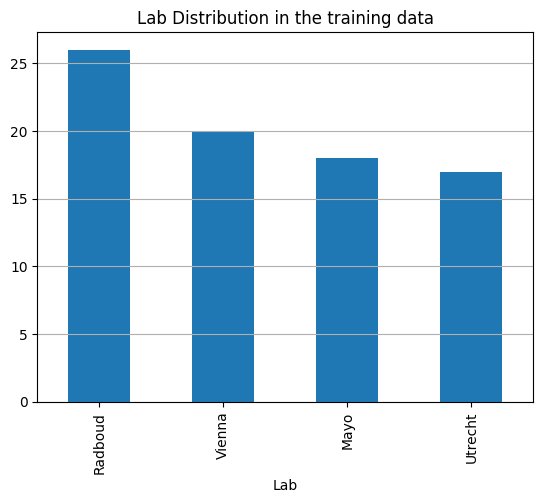

In [52]:
data["Lab"].value_counts().plot(kind='bar')
plt.grid(axis='y')
plt.title("Lab Distribution in the training data")
plt.show()

Diagnosis

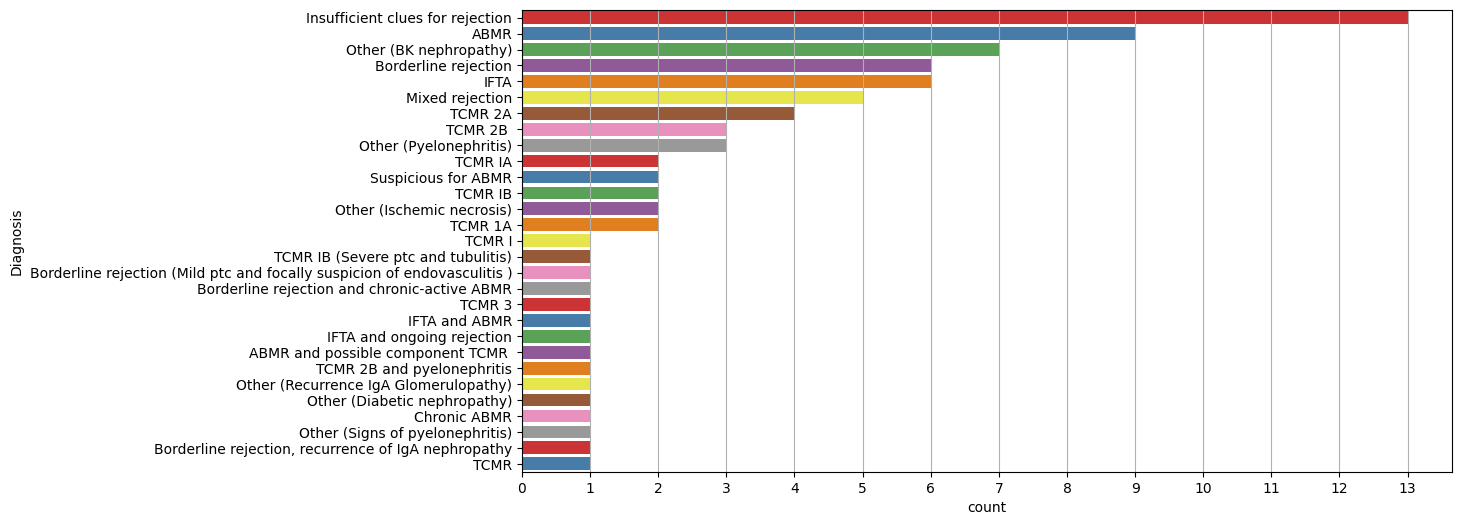

In [39]:
# plot the diagnosis column relative to dataset size
plt.figure(figsize=(12,6))
sns.countplot(data['Diagnosis'], label="Count", palette="Set1", order = data['Diagnosis'].value_counts().index)
plt.grid(axis='x')
#set x ticks to every numnbr of data points
plt.xticks(np.arange(0, max(data['Diagnosis'].value_counts() + 1), step=1))
plt.show()

Slide types presence

In [57]:
# barplot of the columns
slide_types_quality = ["IR_CPG-IHC","IR_CPG-Diagnostic","IR_CPG-Original"]
data[slide_types_quality]

IR_CPG-IHC               IR_CPG-Diagnostic        IR_CPG-Original
Good                     Good                     Good               28
                                                  x                  20
                         x                        x                  12
                         Good, very subtle shift  x                   8
Good, very subtle shift  Good                     x                   3
                         Good, very subtle shift  x                   2
                         Good                     Good                2
Good                     Good, very subtle shift  Good                2
                         Good (but out of focus)  x                   1
                                                  Good                1
Good, very subtle shift  Good (but out of focus)  Good                1
                         Good, very subtle shift  Good                1
Name: count, dtype: int64

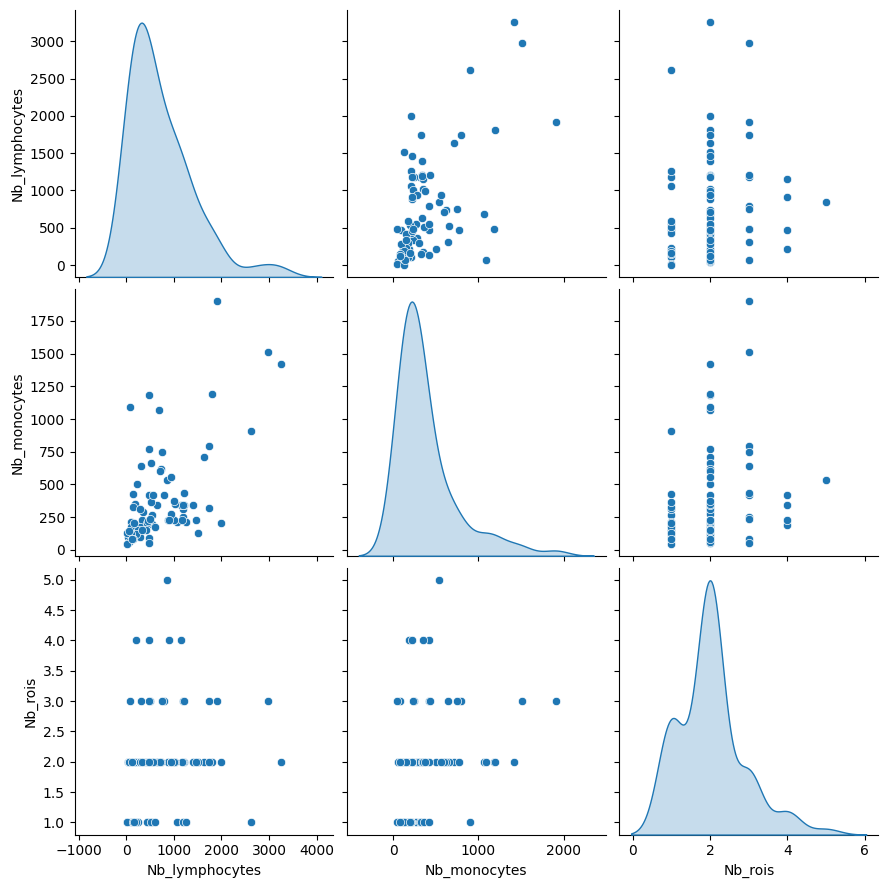

In [21]:
sns.pairplot(data, diag_kind='kde', kind='scatter', palette='husl', markers='o', height=3, aspect=1)
plt.show()

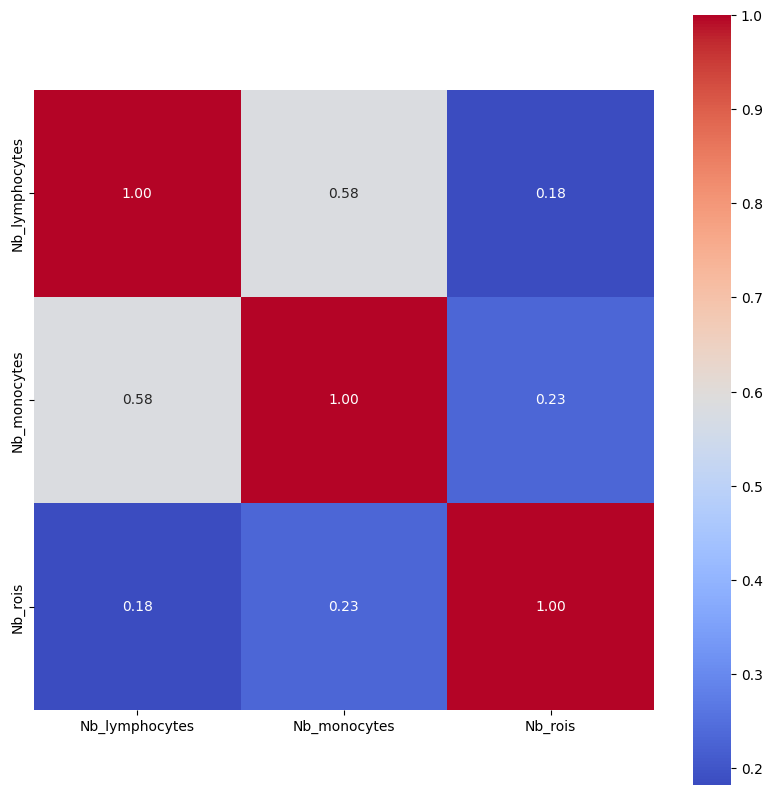

In [24]:
# correlation matrix
num_cols = data.select_dtypes(include=[np.number]).columns
corr = data[num_cols].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, annot_kws={'size': 10})
plt.show()

In [7]:
data.iloc[:, -3:].describe()

,Nb_lymphocytes,Nb_monocytes,Nb_rois
count,81.000000,81.000000,81.000000
mean,729.641975,386.000000,2.024691
std,679.426363,359.883974,0.836291
min,4.000000,47.000000,1.000000
25%,209.000000,162.000000,2.000000
50%,512.000000,251.000000,2.000000
75%,1063.000000,423.000000,2.000000
max,3257.000000,1903.000000,5.000000
